<a href="https://colab.research.google.com/github/nzababaeii/Taxi-trip-dataset/blob/main/Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
! pip install -U kaleido

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from geopy.distance import geodesic
import time
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Taxi Datset.csv' , low_memory=False)

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
11916657,2,02/26/2020 09:05:22 PM,02/26/2020 09:12:35 PM,1.0,1.27,1.0,N,107.0,211.0,1.0,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5
11916658,1,02/26/2020 09:25:56 PM,02/26/2020 09:45:58 PM,1.0,3.80,1.0,N,148.0,17.0,3.0,16.0,3.0,0.5,0.00,0.0,0.3,19.80,2.5
11916659,2,02/26/2020 09:17:43 PM,02/26/2020 09:28:26 PM,1.0,2.06,1.0,N,263.0,229.0,1.0,9.5,0.5,0.5,1.10,0.0,0.3,14.40,2.5
11916660,2,02/26/2020 09:38:38 PM,02/26/2020 09:49:58 PM,1.0,3.70,1.0,N,237.0,42.0,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
11916661,2,02/26/2020 09:02:48 PM,02/26/2020 09:20:27 PM,2.0,5.69,1.0,N,170.0,87.0,1.0,19.5,0.5,0.5,4.66,0.0,0.3,27.96,2.5
11916662,2{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916663,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916664,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916665,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916666,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Remove raws that all of the features are missing

In [6]:
df2=df.drop('VendorID',axis=1)
df2

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_nans_mask = df2.isna().all(axis=1)
all_nans_mask

0           False
1           False
2           False
3           False
4           False
            ...  
11916662     True
11916663     True
11916664     True
11916665     True
11916666     True
Length: 11916667, dtype: bool

In [8]:
df2.dropna(how='all' , inplace=True)
df2

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916657,02/26/2020 09:05:22 PM,02/26/2020 09:12:35 PM,1.0,1.27,1.0,N,107.0,211.0,1.0,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5
11916658,02/26/2020 09:25:56 PM,02/26/2020 09:45:58 PM,1.0,3.80,1.0,N,148.0,17.0,3.0,16.0,3.0,0.5,0.00,0.0,0.3,19.80,2.5
11916659,02/26/2020 09:17:43 PM,02/26/2020 09:28:26 PM,1.0,2.06,1.0,N,263.0,229.0,1.0,9.5,0.5,0.5,1.10,0.0,0.3,14.40,2.5
11916660,02/26/2020 09:38:38 PM,02/26/2020 09:49:58 PM,1.0,3.70,1.0,N,237.0,42.0,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5


# Handling missing value

In [9]:
 df2.isna().sum() / len(df2) * 100

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.767396
trip_distance            0.000000
RatecodeID               0.767396
store_and_fwd_flag       0.767396
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.767396
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
dtype: float64

## choose the most frequent class for missing value

In [10]:
df2.passenger_count.value_counts()

passenger_count
1.0    8494455
2.0    1758003
3.0     461681
5.0     418233
6.0     245829
4.0     224675
0.0     222229
7.0         51
8.0         32
9.0         26
Name: count, dtype: int64

In [11]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the passenger_count column
df2['passenger_count'] = imputer.fit_transform(df2[['passenger_count']])

In [12]:
imputer = SimpleImputer(strategy='mean')
df2['RatecodeID'] = imputer.fit_transform(df2[['RatecodeID']])

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
df2['store_and_fwd_flag'] = imputer.fit_transform(df2[['store_and_fwd_flag']]).ravel()

In [14]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the passenger_count column
df2['payment_type'] = imputer.fit_transform(df2[['payment_type']])

In [15]:
df2.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

## Feature engineering for the dataset includes the extraction and transformation of pickup_time and dropoff_time attributes.


In [16]:
datetime_format = '%m/%d/%Y %I:%M:%S %p'

# Convert to datetime with specified format
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'], format=datetime_format, errors='coerce')
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'],format=datetime_format, errors='coerce')

In [17]:
df2['pickup_hour'] = df2['tpep_pickup_datetime'].dt.hour
df2['pickup_day_of_week'] = df2['tpep_pickup_datetime'].dt.dayofweek
df2['pickup_month'] = df2['tpep_pickup_datetime'].dt.month
df2['pickup_hour'] = df2['tpep_pickup_datetime'].dt.hour

In [18]:
 #Calculate trip duration in minutes
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60

In [19]:
df2.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [20]:
df2.head()

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,pickup_day_of_week,pickup_month,trip_duration
0,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0,2,1,4.800000
1,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0,2,1,7.416667
2,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0,2,1,6.183333
3,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0,2,1,4.850000
4,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0,2,1,2.300000


In [21]:
# Calculate average speed (miles per hour)
df2['average_speed'] = df2['trip_distance'] / (df2['trip_duration'] / 60)

## Feature engineering for store_and_fwd_flag by OneHotEncoder

In [22]:
#One-hot encode the 'store_and_fwd_flag' column
encoder = OneHotEncoder(drop='first')
encoded_flags = encoder.fit_transform(df2[['store_and_fwd_flag']]).toarray()

# Create a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_flags, columns=encoder.get_feature_names_out(['store_and_fwd_flag']))

# Concatenate the encoded columns back to the original DataFrame
df2 = pd.concat([df2, encoded_df], axis=1)

# Drop the original 'store_and_fwd_flag' column if not needed
df2.drop(['store_and_fwd_flag'], axis=1, inplace=True)

In [23]:
df2.RatecodeID.unique()

array([ 1.        ,  5.        ,  3.        ,  2.        ,  4.        ,
       99.        ,  1.05835835,  6.        ])

## Drop unusual data from RatecodeId

In [24]:
# Define the target value and tolerance
target_value = 1.05835835
tolerance = 1e-5  # Adjust the tolerance as needed

# Count the occurrences of target_value in the RatecodeID column within the tolerance
count_1_05 = np.sum(np.isclose(df2['RatecodeID'], target_value, atol=tolerance))

# Calculate the total number of rows in the DataFrame
total_rows = df2.shape[0]

# Calculate the percentage
percentage_1_05 = (count_1_05 / total_rows) * 100

print(f"Percentage of RatecodeID {target_value}: {percentage_1_05:.2f}%")


Percentage of RatecodeID 1.05835835: 0.77%


In [25]:
# Filter out rows where RatecodeID is approximately 1.05835835
df2 = df2[df2['RatecodeID'].round(8) != 1.05835835]

# Decrease memory usage

In [26]:

# Convert float64 to float32
float_cols = df2.select_dtypes(include=['float64']).columns
df2[float_cols] = df2[float_cols].astype('float32')

# Convert int64 to int32
int_cols = df2.select_dtypes(include=['int64']).columns
df2[int_cols] = df2[int_cols].astype('int32')

# Display the memory usage after conversion
print(df2.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
Index: 11825214 entries, 0 to 11916661
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   passenger_count        float32
 1   trip_distance          float32
 2   RatecodeID             float32
 3   PULocationID           float32
 4   DOLocationID           float32
 5   payment_type           float32
 6   fare_amount            float32
 7   extra                  float32
 8   mta_tax                float32
 9   tip_amount             float32
 10  tolls_amount           float32
 11  improvement_surcharge  float32
 12  total_amount           float32
 13  congestion_surcharge   float32
 14  pickup_hour            int32  
 15  pickup_day_of_week     int32  
 16  pickup_month           int32  
 17  trip_duration          float32
 18  average_speed          float32
 19  store_and_fwd_flag_Y   float32
dtypes: float32(17), int32(3)
memory usage: 992.4 MB
None


# Data Analysis

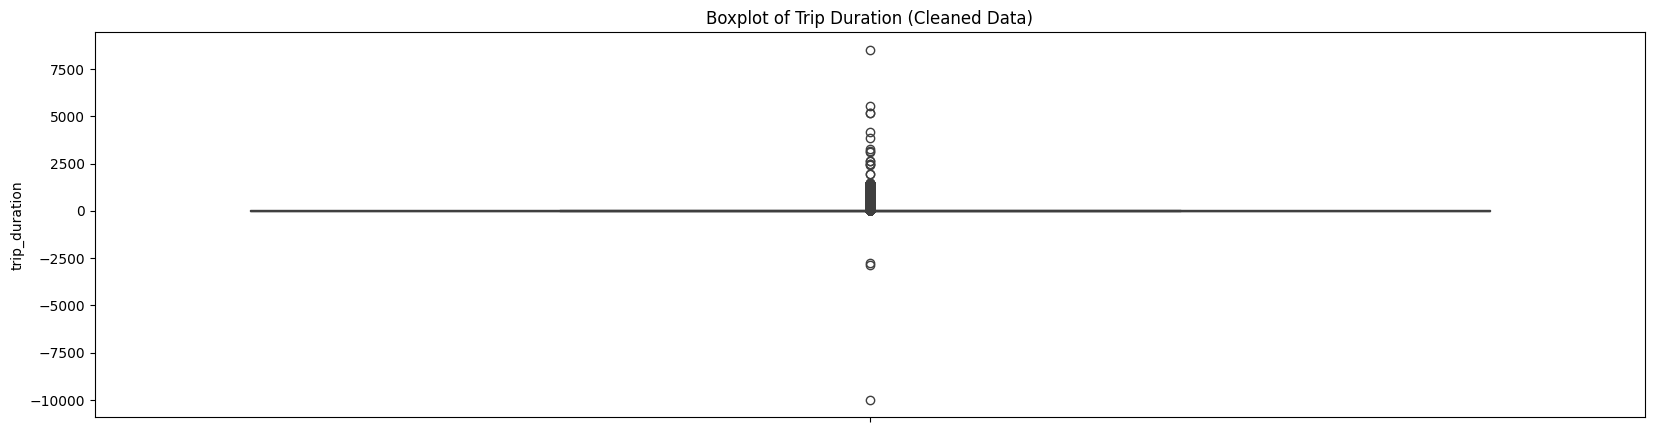

In [27]:
plt.figure(figsize=(20, 5))
sns.boxplot(df2['trip_duration'])
plt.title('Boxplot of Trip Duration (Cleaned Data)')
plt.show()

### Interpretation of the Box Plot

#### Central Box:
- The central box represents the **interquartile range (IQR)**, which contains the middle 50% of the data.
- The line inside the box represents the **median (50th percentile)** of the data.

#### Whiskers:
- The whiskers extend to **1.5 times the IQR** from the lower and upper quartiles. They indicate the range of the majority of the data points.

#### Outliers:
- Data points outside the whiskers are considered **outliers**. They are represented as individual dots.
- In the plot, there are a significant number of outliers both above and below the whiskers, indicating that there are many trips with durations much higher or lower than the majority.

#### Negative Values:
- The presence of negative values in `trip_duration` indicates **data quality issues**, as trip duration cannot logically be negative.


In [28]:
# Remove negative trip durations
df2 = df2[df2['trip_duration'] >= 0]


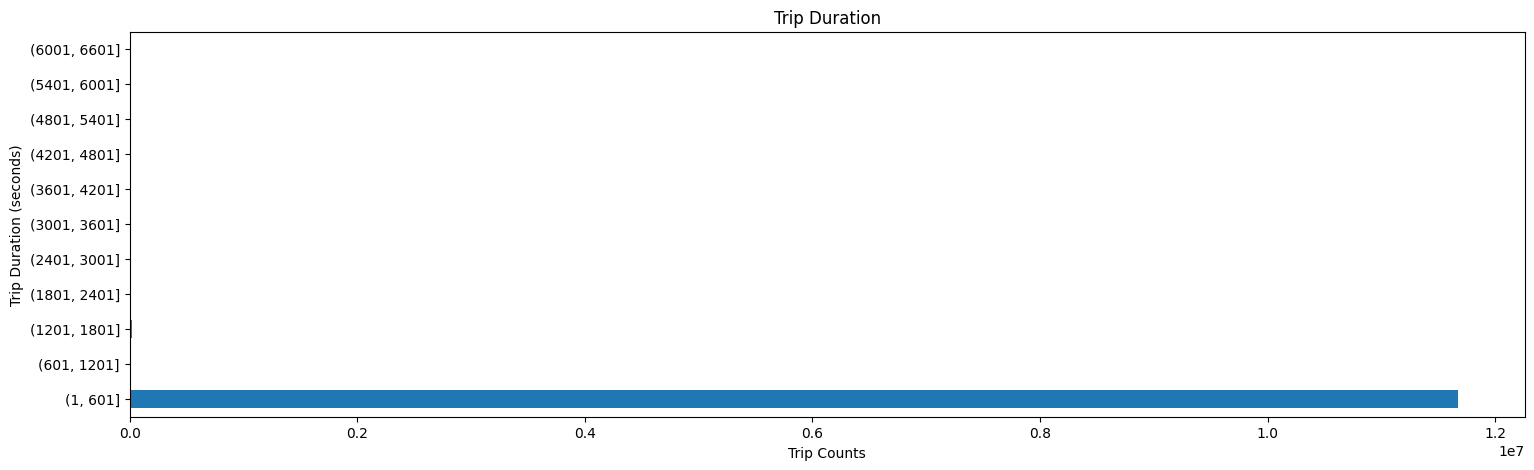

In [29]:
df2.trip_duration.groupby(pd.cut(df2.trip_duration, np.arange(1,max(df2.trip_duration),3600))).count()
df2.trip_duration.groupby(pd.cut(df2.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh',figsize = (18,5))
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

### Trip Duration Distribution

- The majority of trips have a duration in the **lowest bin (1 to 601 seconds)**, indicating that most trips are short (under 10 minutes).
- There are very few or no trips in the **higher bins (above 1201 seconds or 20 minutes)**, which means longer trips are less common in the dataset.


# Distance

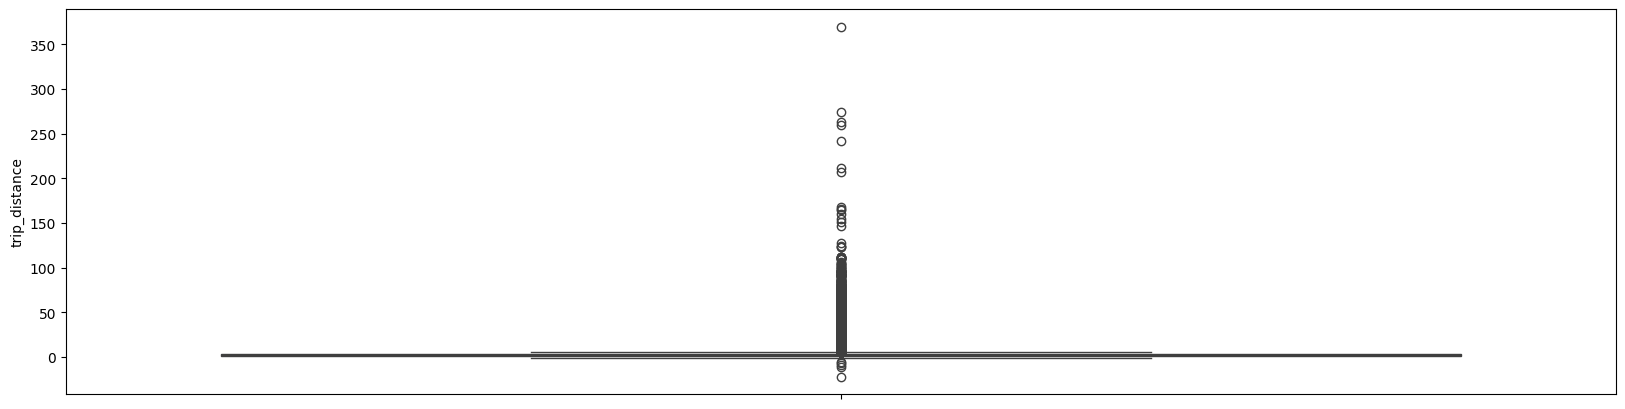

In [30]:
plt.figure(figsize = (20,5))
sns.boxplot(df2.trip_distance)
plt.show()

In [31]:
print(f"There are {df2.trip_distance[df2.trip_distance == 0 ].count()} trip records with 0 miles distance")

There are 121148 trip records with 0 miles distance


### Zero Distance Trips

- There are **121,148 trip records** with a **0 miles distance**. This could indicate several possibilities:

#### Data Entry Errors:
- There could be errors in the data entry or data collection process leading to the recording of 0 miles for trips that did indeed cover a distance.

#### Short Trips:
- These might be trips that were very short, potentially within the same block or very close pickup and dropoff locations.

#### Trip Cancellations:
- These could represent trips that were canceled after being initiated but before any significant distance was traveled.

#### GPS Issues:
- There might be issues with the GPS system failing to record the distance properly.

#### Fare Adjustments:
- In some cases, drivers might start and end the trip at the same location for fare adjustments or other reasons.


In [32]:
# Define thresholds
short_trip_threshold = 1  # distance in miles
long_trip_threshold = 30  # distance in miles

# Find the number of short trips
short_trips = df2[df2['trip_distance'] < short_trip_threshold]
num_short_trips = short_trips.shape[0]

# Find the number of long trips
long_trips = df2[df2['trip_distance'] > long_trip_threshold]
num_long_trips = long_trips.shape[0]

# Display the results
print(f"Number of short trips (< {short_trip_threshold} mile): {num_short_trips}")
print(f"Number of long trips (> {long_trip_threshold} miles): {num_long_trips}")

Number of short trips (< 1 mile): 3098976
Number of long trips (> 30 miles): 5699


## Investigating the effect of different times of day or days of the week on taxi demand


### Group by Hour

In [33]:
# Group by pickup hour and count the number of trips
hourly_demand = df2.groupby('pickup_hour').size()

# Convert to DataFrame for easier plotting
hourly_demand = hourly_demand.reset_index(name='num_trips')

### Group by Day of the Week

In [34]:
# Group by day of the week and count the number of trips
daily_demand = df2.groupby('pickup_day_of_week').size()

# Convert to DataFrame for easier plotting
daily_demand = daily_demand.reset_index(name='num_trips')

### Plot Hourly Demand

<ipython-input-35-406189923cc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='num_trips', data=hourly_demand, palette='viridis')


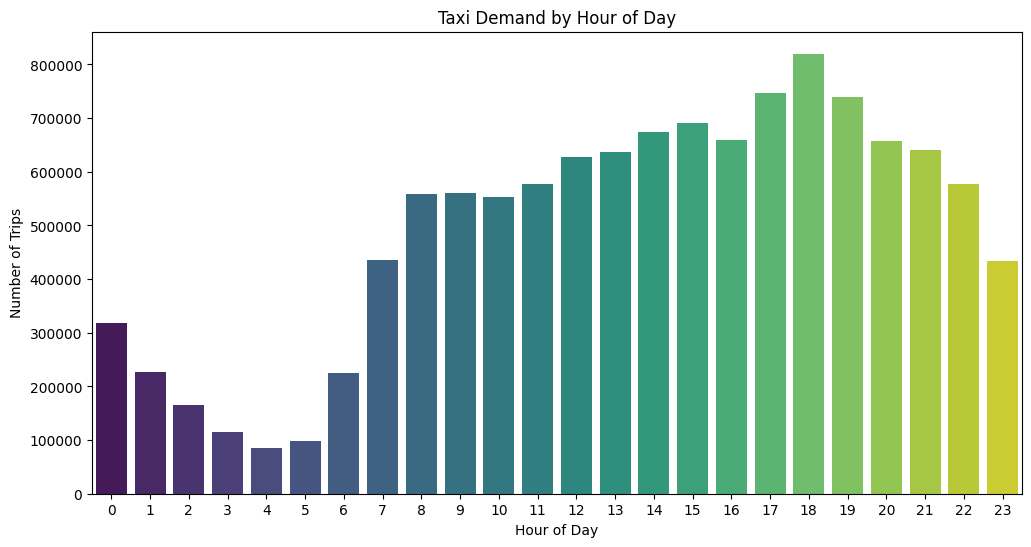

In [35]:
# Plot number of trips by hour
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='num_trips', data=hourly_demand, palette='viridis')
plt.title('Taxi Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.show()

### Plot Daily Demand

<ipython-input-36-1e97af6be687>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_day_of_week', y='num_trips', data=daily_demand, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


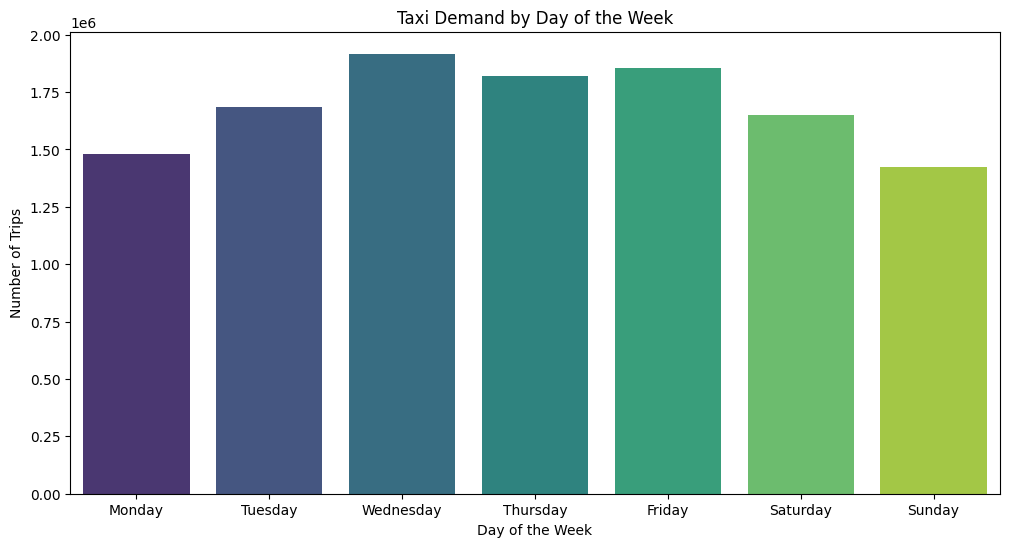

In [36]:
# Mapping day of week numbers to names for better readability
day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_demand['pickup_day_of_week'] = daily_demand['pickup_day_of_week'].map(day_of_week_map)

# Plot number of trips by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_day_of_week', y='num_trips', data=daily_demand, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Taxi Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()


### Peak Hours and Days

- The highest demand is observed during **weekday evenings**, especially around **6 PM**. This is likely due to the evening rush hour.
- **Wednesdays and Fridays** have notably high demand, which could be due to mid-week and end-of-week activities.

### Low Demand Periods

- The lowest demand is observed during **early morning hours (2 AM - 4 AM)** and on **Sundays**.
- This could be due to fewer activities and commuting needs during these times.


# Correlation for predict fare_amount

In [37]:
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Get the correlation with the target variable 'fare_amount'
target_correlation = correlation_matrix['fare_amount'].sort_values(ascending=False)
target_correlation


fare_amount              1.000000
total_amount             0.977142
trip_distance            0.850333
tip_amount               0.562462
tolls_amount             0.530872
RatecodeID               0.249992
trip_duration            0.137488
improvement_surcharge    0.111314
average_speed            0.049932
passenger_count          0.006836
pickup_hour              0.002584
store_and_fwd_flag_Y     0.000208
pickup_month            -0.001074
pickup_day_of_week      -0.006998
extra                   -0.022380
payment_type            -0.048163
mta_tax                 -0.071118
PULocationID            -0.079613
DOLocationID            -0.083046
congestion_surcharge    -0.204149
Name: fare_amount, dtype: float64

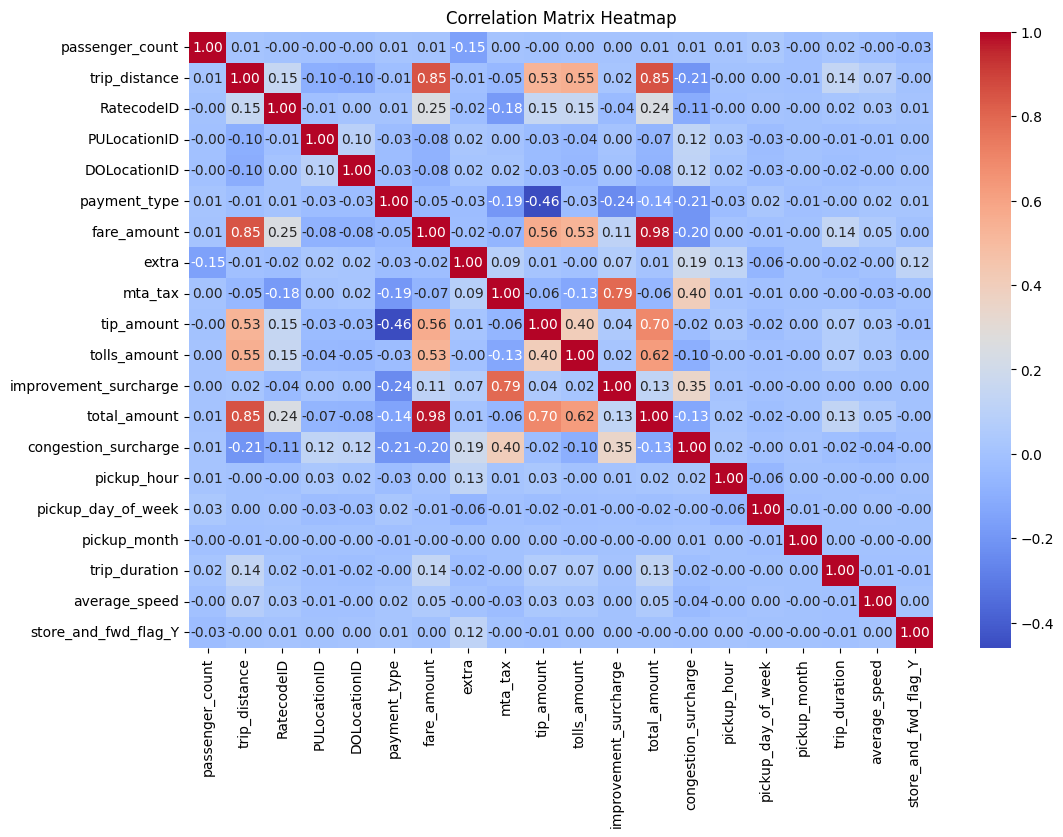

In [38]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## The features which should be remain:
### total_amount , trip_amount , tolls_amount , RatecodeID , trip_duration , improvement_surcharge, ...

In [39]:
# Columns to remove
columns_remove = [
    'trip_distance', 'average_speed', 'passenger_count', 'pickup_hour',
    'pickup_month', 'pickup_day_of_week', 'extra', 'payment_type',
    'PULocationID', 'DOLocationID', 'mta_tax'
]

# Dropping the specified columns
df2_clean = df2.drop(columns=columns_remove)

# Separating features and target
X = df2_clean.drop('fare_amount', axis=1)  # Features
y = df2_clean['fare_amount']  # Target

In [40]:
df2_clean.head()

,RatecodeID,fare_amount,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,store_and_fwd_flag_Y
0,1.0,6.0,1.47,0.0,0.3,11.27,2.5,4.800000,0.0
1,1.0,7.0,1.50,0.0,0.3,12.30,2.5,7.416667,0.0
2,1.0,6.0,1.00,0.0,0.3,10.80,2.5,6.183333,0.0
3,1.0,5.5,1.36,0.0,0.3,8.16,0.0,4.850000,0.0
4,1.0,3.5,0.00,0.0,0.3,4.80,0.0,2.300000,0.0


# Split the Data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# StandardScaler

In [42]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA

In [43]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Multiple linear regression

In [44]:

# Train a Linear Regression model on PCA-transformed data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 37.198341369628906


In [45]:
fare_amount_predict=model.predict(X_test_pca)
predictions = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': fare_amount_predict.flatten()})
predictions

,Actual,Predicted
0,5.5,9.674677
1,10.5,12.128098
2,7.5,9.536174
3,7.5,8.883606
4,20.0,26.615402
...,...,...
1182517,3.5,6.962331
1182518,9.0,11.153961
1182519,12.5,8.935645
1182520,45.5,34.108257


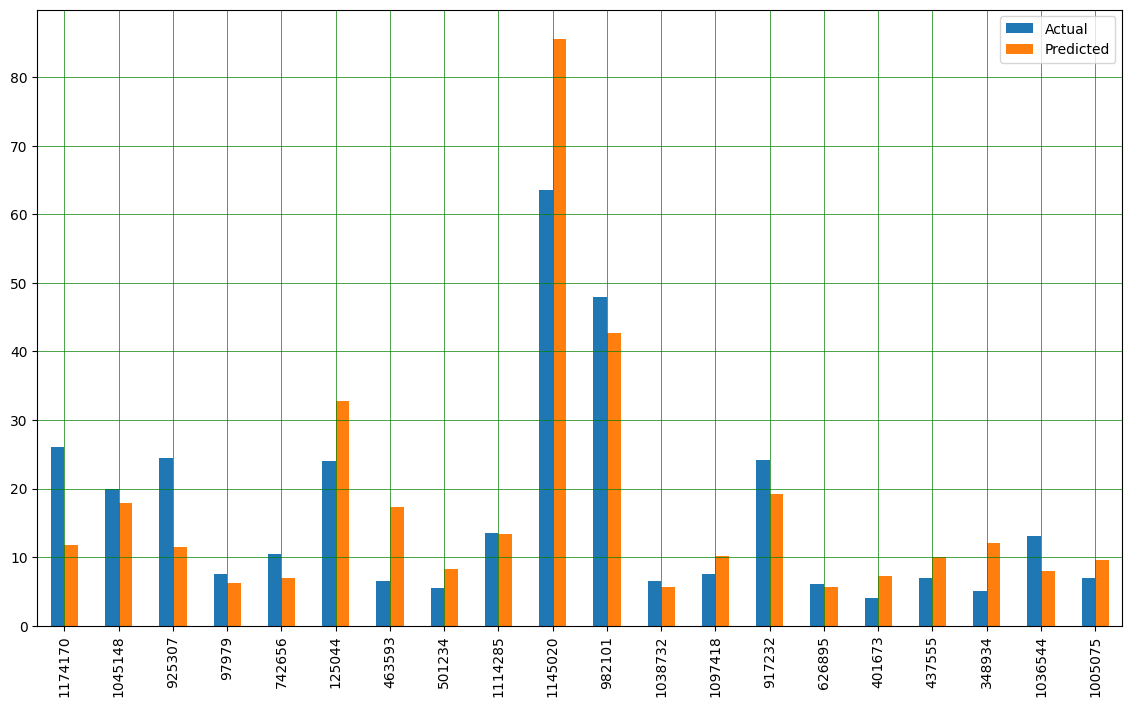

In [46]:
predictions.sample(20).plot(kind='bar', figsize=(14, 8))

# Customize the grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Display the plot
plt.show()

In [47]:
model_score=r2_score(y_test,predictions['Predicted'])
model_score

0.739917231763489

# Decision Tree

In [48]:
# Train a Decision Tree Regressor on PCA-transformed data
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_pca, y_train)

DecisionTreeRegressor(random_state=42)

In [49]:
# Predict using the PCA-transformed test data
fare_amount_predict_tree = tree_model.predict(X_test_pca)

In [50]:

# Create a DataFrame with actual and predicted values for a sample of 20 predictions
predictions_tree = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': fare_amount_predict_tree.flatten()})
predictions_tree_sample = predictions_tree.sample(20)
predictions_tree_sample

,Actual,Predicted
756316,19.500000,19.235294
1027852,33.000000,32.500000
801785,32.200001,32.200001
352773,9.500000,8.983402
998505,11.000000,10.480000
211749,16.000000,16.000000
891156,6.000000,6.000000
229680,9.000000,8.808239
1170507,9.500000,9.496988
977099,11.500000,11.500000


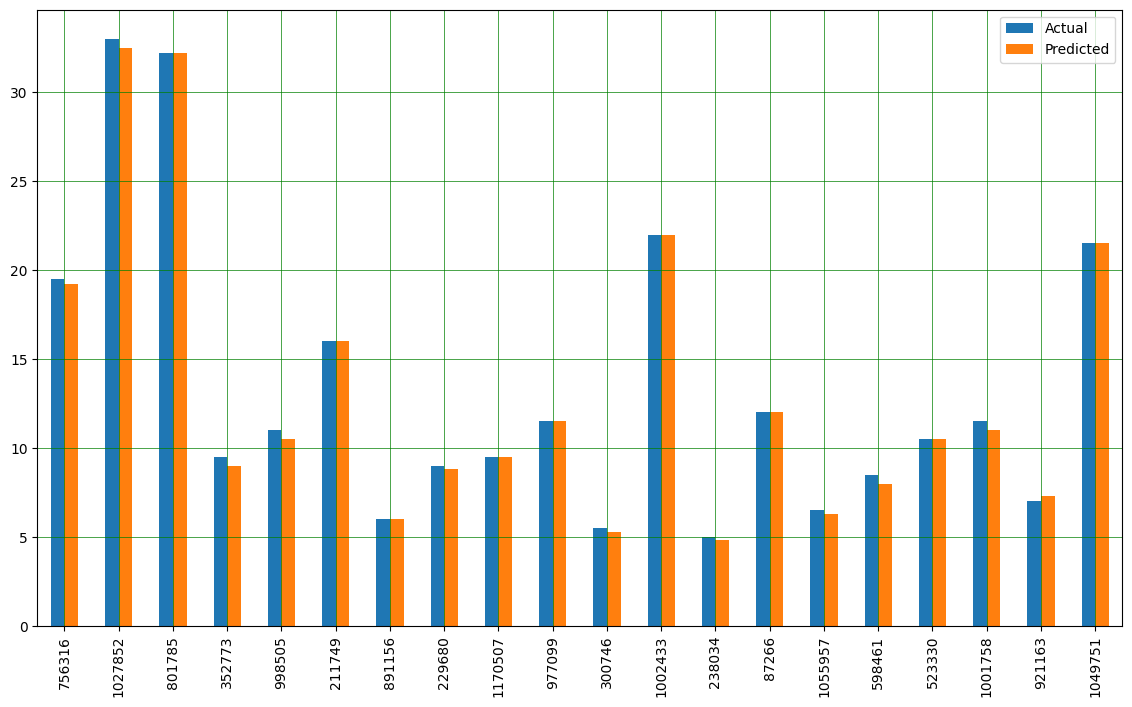

In [51]:
# Plot the sample predictions as a bar plot
predictions_tree_sample.plot(kind='bar', figsize=(14, 8))

# Customize the grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Display the plot
plt.show()

## Checking overfitting

In [52]:
# Predict and evaluate on training data
train_predictions = tree_model.predict(X_train_pca)
mse_train = mean_squared_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)
print(f"Training Data - Mean Squared Error: {mse_train}")
print(f"Training Data - R2 Score: {r2_train}")

# Predict and evaluate on test data
test_predictions = tree_model.predict(X_test_pca)
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)
print(f"Test Data - Mean Squared Error: {mse_test}")
print(f"Test Data - R2 Score: {r2_test}")

Training Data - Mean Squared Error: 0.08799178488187102
Training Data - R2 Score: 0.9993623498113281
Test Data - Mean Squared Error: 5.449658462096385
Test Data - R2 Score: 0.9618971706389445


### The difference between the training and test MSEs suggests some overfitting, but it is not severe. The model performs well on both training and test data, indicating it generalizes reasonably well.

# Adaboost

In [53]:
# Train an AdaBoost Regressor on PCA-transformed data
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train_pca, y_train)

AdaBoostRegressor(random_state=42)

In [54]:
# Predict using the PCA-transformed test data
fare_amount_predict_adaboost = adaboost_model.predict(X_test_pca)

In [55]:
# Calculate the Mean Squared Error (MSE)
mse_adaboost = mean_squared_error(y_test, fare_amount_predict_adaboost)
print(f"Mean Squared Error (AdaBoost): {mse_adaboost}")

Mean Squared Error (AdaBoost): 64.78968575430402


In [56]:
# Calculate the R2 score
r2_score_adaboost = r2_score(y_test, fare_amount_predict_adaboost)
print(f"R2 Score (AdaBoost): {r2_score_adaboost}")

R2 Score (AdaBoost): 0.5470045769248082


In [57]:
# Create a DataFrame with actual and predicted values for a sample of 20 predictions
predictions_adaboost = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': fare_amount_predict_adaboost.flatten()})
predictions_adaboost_sample = predictions_adaboost.sample(20)
predictions_adaboost_sample

,Actual,Predicted
188715,8.5,12.723797
684062,13.0,15.953967
217446,11.0,12.723797
824182,25.5,31.912317
790954,7.0,12.723797
392231,14.0,15.953967
438,6.0,12.723797
198553,9.0,12.723797
616097,12.5,12.723797
1177393,10.5,12.723797


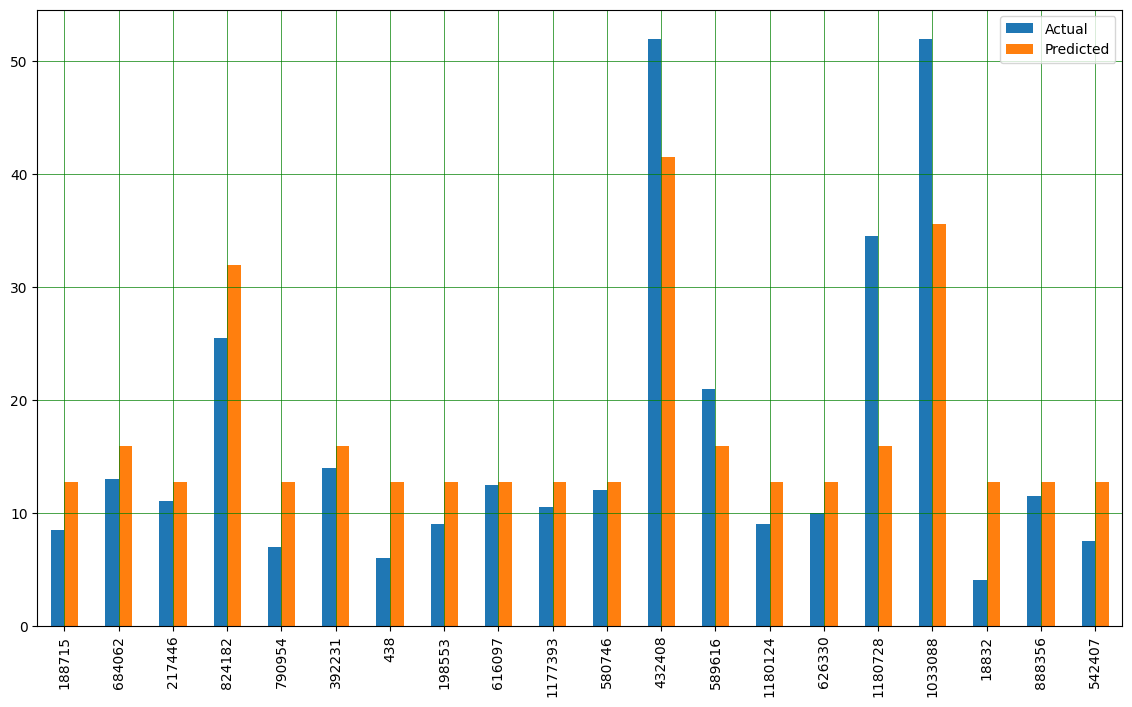

In [58]:
# Plot the sample predictions as a bar plot
predictions_adaboost_sample.plot(kind='bar', figsize=(14, 8))

# Customize the grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Display the plot
plt.show()

# Gradient Boost

In [59]:
# Train a Gradient Boosting Regressor on PCA-transformed data
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_pca, y_train)

GradientBoostingRegressor(random_state=42)

In [60]:
# Predict using the PCA-transformed test data
fare_amount_predict_gb = gb_model.predict(X_test_pca)

In [61]:
# Calculate the Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, fare_amount_predict_gb)
print(f"Mean Squared Error (Gradient Boosting): {mse_gb}")

# Calculate the R2 score
r2_score_gb = r2_score(y_test, fare_amount_predict_gb)
print(f"R2 Score (Gradient Boosting): {r2_score_gb}")

Mean Squared Error (Gradient Boosting): 9.79009413156514
R2 Score (Gradient Boosting): 0.9315497863364819


In [71]:
# Create a DataFrame with actual and predicted values for a sample of 20 predictions
predictions_gb = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': fare_amount_predict_gb.flatten()})
predictions_gb_sample = predictions_gb.sample(20)
predictions_gb_sample

,Actual,Predicted
834238,3.5,4.619906
447259,7.0,6.958747
506090,38.5,37.757059
711971,13.5,11.908390
242046,6.0,6.477098
1010447,6.0,5.876772
1145413,9.5,9.530962
171399,8.5,8.250264
1163266,15.5,15.290862
92504,12.0,11.512545


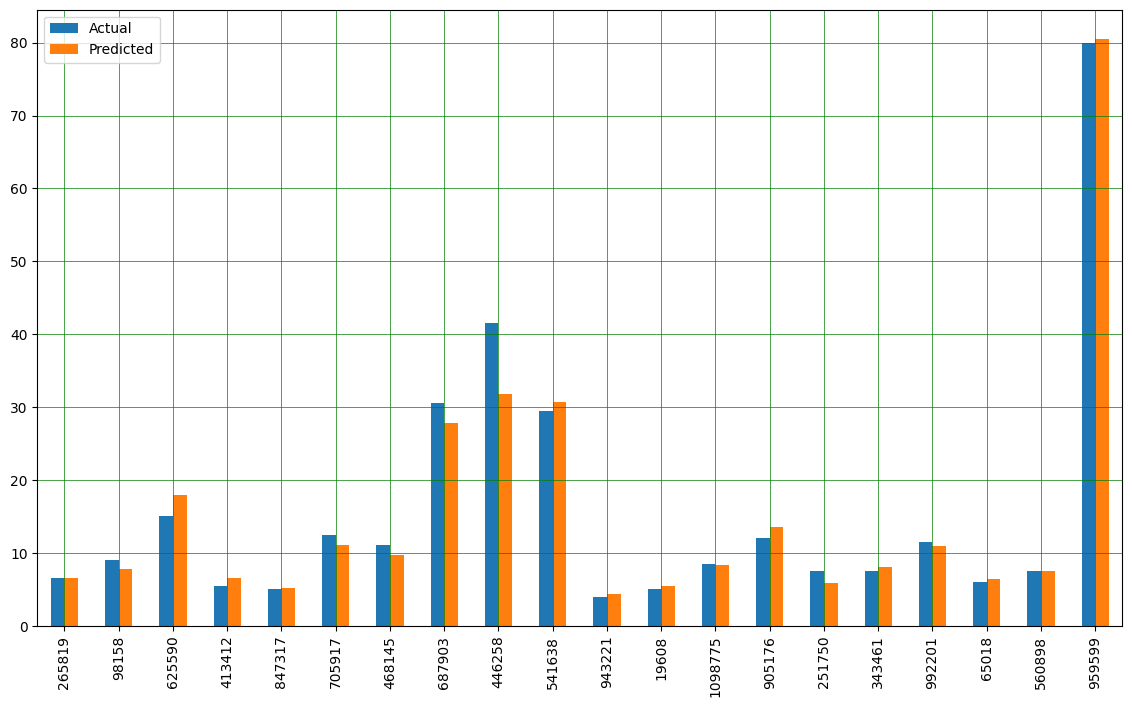

In [63]:
# Plot the sample predictions as a bar plot
predictions_gb_sample.plot(kind='bar', figsize=(14, 8))

# Customize the grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Display the plot
plt.show()

# XGBoost

In [65]:
# Train an XGBoost Regressor on PCA-transformed data
regression = XGBRegressor(objective ='reg:squarederror')
regression = regression.fit(X_train_pca, y_train)

In [66]:
# Predict using the PCA-transformed test data
fare_amount_predict_xgb = regression.predict(X_test_pca)

In [67]:
# Calculate the Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, fare_amount_predict_xgb)
print(f"Mean Squared Error (XGBoost): {mse_xgb}")
# Calculate the R2 score
r2_score_xgb = r2_score(y_test, fare_amount_predict_xgb)
print(f"R2 Score (XGBoost): {r2_score_xgb}")


Mean Squared Error (XGBoost): 6.544820785522461
R2 Score (XGBoost): 0.9542400397572329


In [70]:
# Create a DataFrame with actual and predicted values for a sample of 20 predictions
predictions_xgb = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': fare_amount_predict_xgb.flatten()})
predictions_xgb_sample = predictions_xgb.sample(20)
predictions_xgb_sample

,Actual,Predicted
414872,8.5,7.806161
755510,7.0,7.246090
719029,9.5,9.243859
894313,40.0,46.702156
802528,4.5,4.114717
458250,17.5,17.822626
493894,8.5,8.083365
1089147,8.0,7.631153
276902,12.0,11.973228
411997,7.0,7.539491


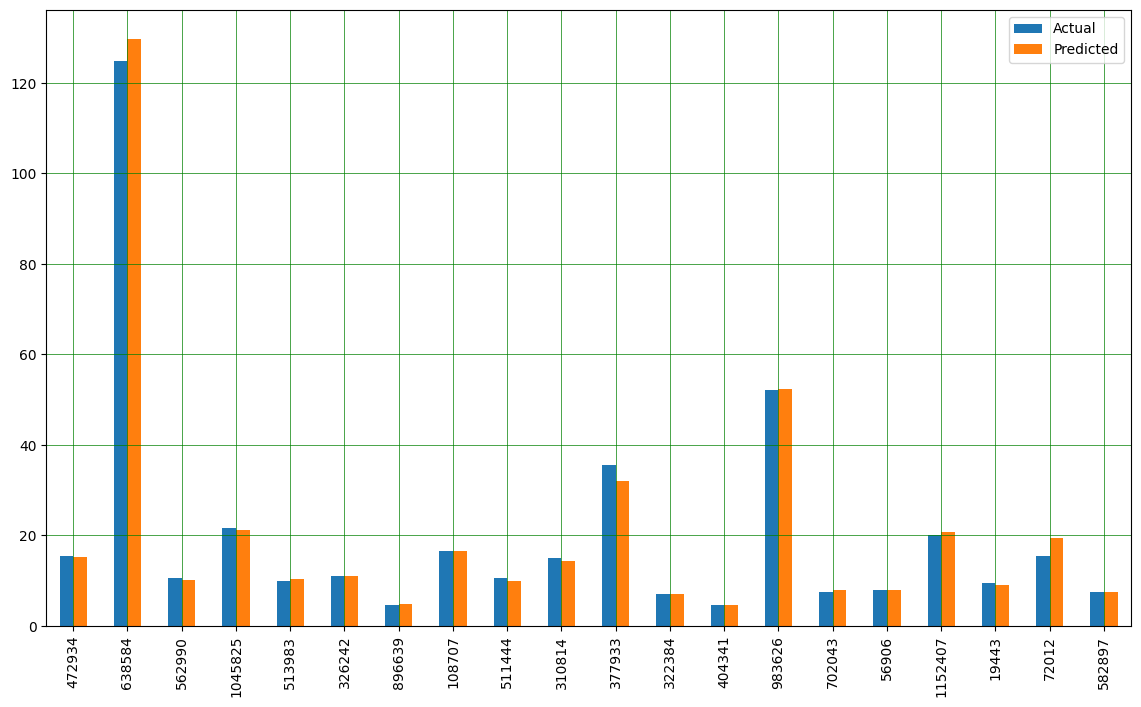

In [69]:
# Plot the sample predictions as a bar plot
predictions_xgb_sample.plot(kind='bar', figsize=(14, 8))

# Customize the grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Display the plot
plt.show()

# Random forest model

In [ ]:
# Train a Random Forest Regressor on PCA-transformed data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_pca, y_train)

In [ ]:
# Predict using the PCA-transformed test data
fare_amount_predict_rf = rf_model.predict(X_test_pca)

In [ ]:
# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, fare_amount_predict_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

# Calculate the R2 score
r2_score_rf = r2_score(y_test, fare_amount_predict_rf)
print(f"R2 Score (Random Forest): {r2_score_rf}")

In [ ]:
# Create a DataFrame with actual and predicted values for a sample of 20 predictions
predictions_rf = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': fare_amount_predict_rf.flatten()})
predictions_rf_sample = predictions_rf.sample(20)
predictions_rf_sample

In [ ]:
# Plot the sample predictions as a bar plot
predictions_rf_sample.plot(kind='bar', figsize=(14, 8))

# Customize the grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Display the plot
plt.show()

#  Model Comparison

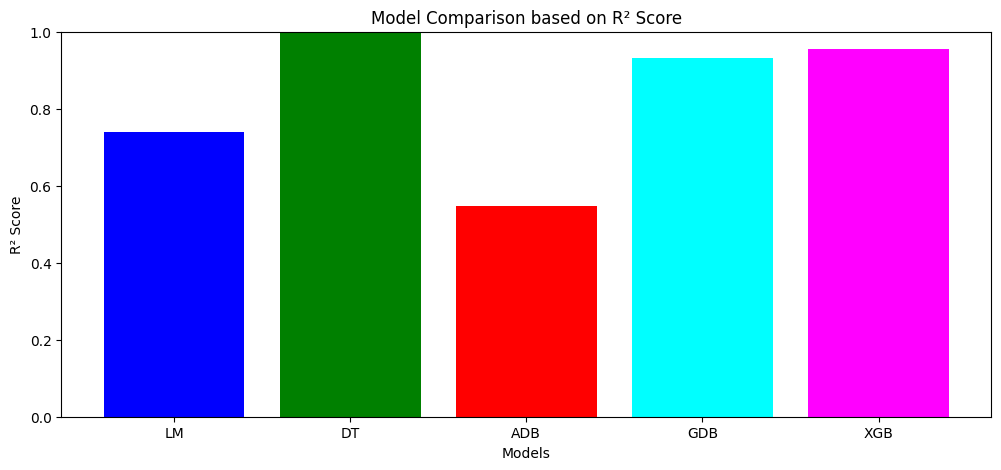

In [6]:
lm_score = r2_score_linear_regression
dt_score = r2_score_decision_tree
adb_score = r2_score_adaboost
gdb_score = r2_score_gb
xgb_score = r2_score_xgb

# Correct labels
labels = ['LM', 'DT', 'ADB', 'GDB', 'XGB']

# Create a bar plot for model comparison
fig, ax = plt.subplots(figsize=(12, 5))

# Plot R² scores
ax.bar(labels, r2_scores, color=['blue', 'green', 'red', 'cyan', 'magenta'])

# Set titles and labels
ax.set_title('Model Comparison based on R² Score')
ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_ylim(0, 1)  # Set the limit of y-axis for better visualization

# Display the plot
plt.show()